# NEOPRENE notebooks

***

This notebook is part of a notebook collection available at the [NEOPRENE Project Site](https://github.com/IHCantabria/NEOPRENE) for illustration, reproducibility and reusability purposes. This notebook is licensed under the [Creative Commons Attribution 4.0 International License](http://creativecommons.org/licenses/by/4.0).

![Creative Commons License >](https://i.creativecommons.org/l/by/4.0/88x31.png)

# Calibrating and synthetic simulations of Rainfall with the STNSRPM.


In this script we calibrate the STNSRPM (Spatio Temporal Neyman Scott Rectangular Pulse Model) using several rainfall series from Tenerife Island with a semi-arid climate (BSh-BSk). The calibration parameters are used to simulate several decades of synthetic rainfall data which can be very useful for rainfall extreme analysis or disaggregation purposes, among other things.

The script also contains:

1. a validation section where the observed series are compared with the simulated ones in terms of their statistics and exceedance probabilities. 

2. a disaggregation function to disaggreate daily to hourly rainfall data.

### Load packages

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from scipy.interpolate import interp1d
import tqdm

In [3]:
import math as mt
from datetime import date
from datetime import timedelta
from scipy import stats

In [4]:
from NEOPRENE.STNSRP.HiperParams import Calibration as Calhps, Simulation as Simhps
from NEOPRENE.STNSRP.Statistics import Statistics
from NEOPRENE.STNSRP.utils import compare_statistics, haversine, datetime2matlabdnJavi 
from NEOPRENE.STNSRP.Calibration import Calibration
from NEOPRENE.STNSRP.MathematicalPropertiesSTNSRP import STNSRP_fi_min
from NEOPRENE.NSRP.Simulation import Simulation as Simulation_NSRP

In [5]:
import warnings
warnings.filterwarnings('ignore')

### Loading daily rainfall for Tenerife Island (now for Sierra Nevada)

In [6]:
path_1 = './auxiliary-materials/SIERRA_NEVADA/'

In [7]:
## Loading rainfall series
Series_SN = pd.read_csv(path_1 + 'DailyGuadalfeo.csv', index_col=0, parse_dates=True)
Series_SN[Series_SN.values<0]=np.nan
Input_Series=Series_SN.copy()
del Series_SN

In [8]:
## Loading attributes for the series
Attributes_SN = pd.read_csv(path_1 + 'AtributosGuadalfeo.csv', index_col=0)
Input_Attr=pd.DataFrame()
Input_Attr['ID']=[str(i) for i in Attributes_SN.field_1.values]
Input_Attr['X']=Attributes_SN.Long.values
Input_Attr['Y']=Attributes_SN.Lat.values
Input_Attr['Elevation']=Attributes_SN.field_4.values

In [9]:
## Shorting ID series to match with Input_Attr
Input_Series = Input_Series[Input_Attr.ID]

In [10]:
## Quitar esto. Por ahora selecciono únicamente 5 estaciones para que no tarde tanto
Input_Series = Input_Series.iloc[: , 0:5]
Input_Attr = Input_Attr.head(5)

### Plotting rainfall series, seasonality and gauge position

Text(0, 0.5, 'mm/month')

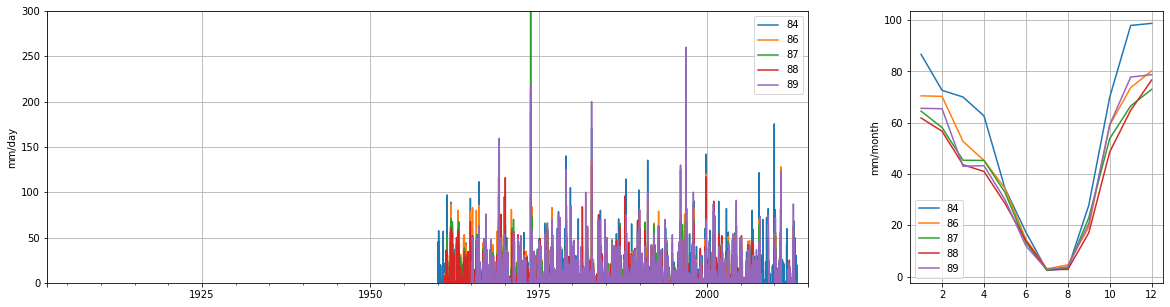

In [11]:
f, (ax0, ax1) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [3, 1]}, figsize=(20, 5))

t1=str(Input_Series.index.year[0]); t2=str(Input_Series.index.year[-1])
Input_Series.plot(xlim=(t1, t2),  ylim=(0, 300), ax = ax0)
ax0.grid(True)
ax0.set_ylabel('mm/day')

grouped_m = Input_Series.groupby(lambda x: x.month)
Month_sum=grouped_m.sum()*24/(len(Input_Series>=0)/30)
Month_sum.plot(ax = ax1)
ax1.grid(True)
ax1.set_ylabel('mm/month')

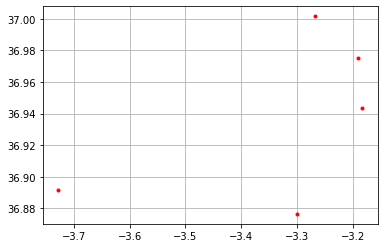

In [12]:
plt.plot(Input_Attr.X, Input_Attr.Y, '.r')
plt.grid()

### Calibration

Compleate...

In [14]:
# Reading hiperparamteres for the calibration
hiper_params_cal = Calhps('./Input_Cal_SN.yml')

In [15]:
# Input statistics calculated from several Rainfall series
statistics_model_1 = Statistics(hiper_params_cal, time_series = Input_Series, attributes = Input_Attr)

# Input statistics from file 
#statistics_model_2 = Statistics(hiper_params_cal, file = 'auxiliary-materials/statististics_Bilbao.csv')

In [16]:
CAL              = Calibration(hiper_params_cal) 
CAL1             = CAL(statistics_model_1, Input_Series, verbose=True)
#CAL1.save_files('./CAL3/')#save python objects

[20, 1000]


################################################################################
Adjustment of parameters using the Particle Swarm Optimization (PSO)



Fitting the months = (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)

Initialization number  = 0
Initial best position  15.749531780126935 [7.27331409e-02 7.67914558e+01 9.62647597e+01 1.15697066e+00
 8.67979501e-01 2.63060653e-02]
Iteration number  = 0
Total error = 15.749531780126935
Iteration number  = 1
Total error = 15.749531780126935
Iteration number  = 2
Total error = 8.987692754907568
Iteration number  = 3
Total error = 7.393016385675455
Iteration number  = 4
Total error = 7.156652390797717
Iteration number  = 5
Total error = 7.1390041522113785
Iteration number  = 6
Total error = 7.053280781023076
Iteration number  = 7
Total error = 7.001711070751278
Iteration number  = 8
Total error = 6.70315854253605
Iteration number  = 9
Total error = 6.429145552713889
Iteration number  = 10
Total error = 6.425774887575332
Iteration num

In [17]:
# Reading hiperparamteres for the simulation
hiper_params_sim = Simhps('./Input_Sim_SN.yml')

In [ ]:
SIM              = Simulation(hiper_params_sim) 

# Input parameters from the model
SIM1             = SIM(params_cal = CAL1)

<AxesSubplot:>

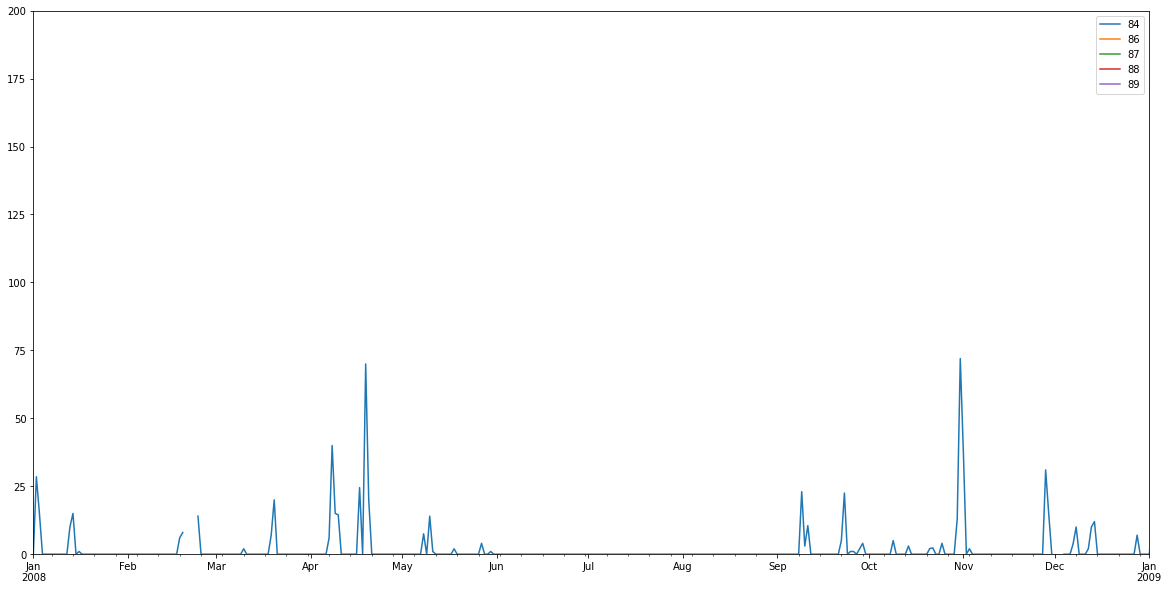

In [101]:
Input_Series.plot(figsize=(20, 10), xlim=['2008-01-01', '2009-01-01'], ylim=[0, 200])

In [79]:
statistics_model_2 = Statistics(hiper_params_cal, time_series = Dataframe_result_joder, attributes = Input_Attr)


e:\github\neoprene\NEOPRENE\STNSRP\libs_STNSRP.py:148: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  Correlacion_distancia=pd.DataFrame(np.vstack({tuple(row) for row in Correlacion_distancia.values}), columns=['Corr', 'dist'])
C:\Users\navass\Anaconda3\envs\NEOPRENE\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [80]:
statistics_model_2.statistics_dataframe

{(1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12):                     84        86        87        88        89
 var_1         2.903686  2.921702  2.912333  2.918576  2.915370
 var_2         2.623000  2.642800  2.636469  2.642495  2.634029
 var_3         2.446765  2.459111  2.451295  2.459382  2.454796
 var_4         2.212358  2.224017  2.216323  2.223523  2.217807
 autocorr_1_1  0.651361  0.651352  0.650242  0.652253  0.648646
 autocorr_2_1  0.330868  0.326723  0.327787  0.324085  0.328134
 autocorr_3_1  0.161551  0.159021  0.158279  0.157202  0.158615
 fih_1         0.673782  0.673782  0.674056  0.674330  0.673782
 fiWW_1        0.885067  0.889262  0.890008  0.894118  0.888423
 fiDD_1        0.944354  0.946385  0.946813  0.948864  0.945979
 M3_1          3.544365  3.579918  3.562813  3.557067  3.565085}

In [81]:
statistics_model_1.statistics_dataframe

{(1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12):                     84        86         87        88        89
 var_1         3.928016  4.202397   4.325284  4.147747  4.422130
 var_2         3.173755  3.361884   3.398169  3.312075  3.612510
 var_3         2.802646  2.942537   2.914652  2.854825  3.062478
 var_4         2.616425  2.677107   2.659212  2.595544  2.860599
 autocorr_1_1  0.327023  0.282296   0.228050  0.244593  0.294978
 autocorr_2_1  0.187547  0.149090   0.117312  0.133381  0.146291
 autocorr_3_1  0.123655  0.114988   0.101955  0.104044  0.090298
 fih_1         0.842020  0.860330   0.839174  0.875881  0.874295
 fiWW_1        0.516495  0.485378   0.576744  0.403341  0.432722
 fiDD_1        0.909285  0.916454   0.918884  0.915449  0.918438
 M3_1          7.284825  8.184015  15.781429  8.085969  9.811701}

In [82]:
statistics_model_2.crosscorr_dataframe

{'crosscorr_1': {(1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12):         dist  cross_corr
  0   2.435390    0.997656
  1   7.306170    0.997656
  2  12.176950    0.997656
  3  17.047730    0.997656
  4  21.918509    0.997656
  5  26.789289    0.997656
  6  31.660069    0.997656
  7  36.530849    0.997656
  8  41.401629    0.997656
  9  46.272409    0.997656},
 'crosscorr_2': {(1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12):         dist  cross_corr
  0   2.435390    0.998586
  1   7.306170    0.998586
  2  12.176950    0.998586
  3  17.047730    0.998586
  4  21.918509    0.998586
  5  26.789289    0.998586
  6  31.660069    0.998586
  7  36.530849    0.998586
  8  41.401629    0.998586
  9  46.272409    0.998586}}

In [83]:
statistics_model_1.crosscorr_dataframe

{'crosscorr_1': {(1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12):         dist  cross_corr
  0   2.435390    0.838105
  1   7.306170    0.693508
  2  12.176950    0.646686
  3  17.047730    0.631524
  4  21.918509    0.626615
  5  26.789289    0.625025
  6  31.660069    0.624510
  7  36.530849    0.624344
  8  41.401629    0.624290
  9  46.272409    0.624272},
 'crosscorr_2': {(1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12):         dist  cross_corr
  0   2.435390    0.896643
  1   7.306170    0.797125
  2  12.176950    0.761102
  3  17.047730    0.748062
  4  21.918509    0.743342
  5  26.789289    0.741634
  6  31.660069    0.741015
  7  36.530849    0.740791
  8  41.401629    0.740710
  9  46.272409    0.740681}}

In [84]:
CAL1.Fitted_parameters

,"(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)"
landa,0.026880
ipsilon,14.853423
eta,1176.088864
betha,0.642097
fi_may,0.100000


# Hasta aquí

In [ ]:
SIM              = Simulation(hiper_params_sim) 

# Input parameters from the model
SIM1             = SIM(params_cal = CAL1)

# Input parameters from a dataframe
#SIM2             = SIM(params_cal = './CAL2/Calibrated_parameters.csv')

SIM1.save_files('./SIM1/')
#SIM2.save_files('./SIM2/')

### Validation

In [ ]:
# Comparing the values of the statistcs (observed, fitted and simulated).
compare_statistics(CAL1, SIM1)

In [ ]:
# Comparing exceedence Probability betwen Observed and Simulated series
exceedence_probability(Input_Serie, SIM1.Daily_Simulation, SIM1.temporal_resolution)

### Disaggregation (daily-to-hourly)

Disaggregation process might take some minutes to dissagregate several decades of data. Here we select only 5 year as an example

In [ ]:
# Peiod selected from the input (onserved) serie
year1 = 2000; year2 = 2005
x_series = Input_Serie[(Input_Serie.index.year >= year1) & (Input_Serie.index.year < year2)]

In [ ]:
# Defining hourly synthetic serie
y_series=SIM1.Hourly_Simulation.copy()

In [ ]:
# Daily-to-hourly disaggregation
hourly_disaggregation = disaggregate_rainfall(x_series, y_series)

In [ ]:
# Resampling hourly disaggregated serie to daily one
daily_disaggregation = hourly_disaggregation.resample('D').agg(pd.Series.sum, min_count=1)
# Calculating statistics from the disaggregated daily resample serie and for the period selected from the Input serie
statistics_model_3 = Statistics(hiper_params_cal, time_series = x_series)
statistics_disaggregated = Statistics(hiper_params_cal, time_series = daily_disaggregation)

In [ ]:
# Comparing daily observed statiscis with dialy dissagregated ones
statistics_model_3.statististics_dataframe.compare(statistics_disaggregated.statististics_dataframe)

In [ ]:
# Plotting observed daily series and disaggregated ones (daily and horly) for a specific period
t1 = str(year1) + '/02/01'; t2 = str(year1) + '/02/28'
f = x_series.plot(xlim=(t1, t2),  ylim=(0, 20), color = 'b', style= '-', linewidth = '3', figsize = (20, 5))
l = daily_disaggregation.plot(xlim=(t1, t2),  ylim=(0, 20), color = 'r', style = '--', ax = f)
hourly_disaggregation.plot(xlim=(t1, t2),  ylim=(0, 20), color = 'g', style = '--o', ax = f)
plt.legend(['Obs. (daily)', 'Disagg. (daily)', 'Disagg. (hourly)'], fontsize = 15)
plt.grid(True)
plt.tick_params(axis = 'both', labelsize = 15)
plt.ylabel('mm/day', fontsize = 15)

## Session info

In [ ]:
!conda list

In [ ]:
def STNSRP_simulation(Parametros_meses, Dataframe_xi, year_ini, year_fin, temporal_resolution, I_F, XX, YY,\
                     Pos_tierra, Row_tierra, Colum_tierra, spatially_varying_intensity, Estaciones, storm_radius):
    n=0
    if process=='normal' or process=='cells':
    
        landa=Parametros_meses[Parametros_meses.index=='landa'].values[0];Storm_origin=1/landa##Poisson process
        ipsilon=Parametros_meses[Parametros_meses.index=='ipsilon'].values[0];Number_cells_per_storm=ipsilon##Random poisson mean ¿ipsilon-1?

        if process=='normal':
            eta=Parametros_meses[Parametros_meses.index=='eta'].values[0]; Duracion_cell=1/eta##exponencial random
            if I_F=='W' or I_F=='G':
                alpha=Parametros_meses[Parametros_meses.index=='alpha'].values[0];
        elif process=='cells':    
            eta1=Parametros_meses[Parametros_meses.index=='eta1'].values[0]; Duracion_cell1=1/eta1##exponencial random
            eta2=Parametros_meses[Parametros_meses.index=='eta2'].values[0]; Duracion_cell2=1/eta2##exponencial random
            Dataframe_xi2=Dataframe_xi.copy()
            Dataframe_xi2=Dataframe_xi2*eta1/eta2
            alpha_p1=Parametros_meses[Parametros_meses.index=='alpha_p1'].values[0]
            if I_F=='W' or I_F=='G':
                alpha1=Parametros_meses[Parametros_meses.index=='alpha1'].values[0];
                alpha2=Parametros_meses[Parametros_meses.index=='alpha2'].values[0];

        betha=Parametros_meses[Parametros_meses.index=='beta'].values[0]; Dist_cell_origin=1/betha##exponencial random
        fi_may=Parametros_meses[Parametros_meses.index=='fi_may'].values[0]; Radio=1/fi_may
        if storm_radius==True:
            fi_may_s=Parametros_meses[Parametros_meses.index=='fi_may_s'].values[0]; Radio_s=1/fi_may_s


        time_d=pd.date_range(start=str((year_ini))+'-01-01',  end=str((year_fin))+'-01-01', freq='D')
        time_h=pd.date_range(start=str((year_ini))+'-01-01',  end=str((year_fin))+'-01-01', freq='h')
        time_min=pd.date_range(start=str((year_ini))+'-01-01',  end=str((year_fin))+'-01-01', freq='min')

        Dataframe_simulacion_unido_day_estaciones=pd.DataFrame(index=time_d)
        Dataframe_simulacion_unido_hour_estaciones=pd.DataFrame(index=time_h)
        Dataframe_simulacion_unido_min_estaciones=pd.DataFrame(index=time_min)
        tt=pd.date_range(start=datetime.datetime(year_ini,1, 1),end=datetime.datetime(year_fin,1, 1), freq='min')##Si esto lo pones en
        ##en segundos abajo hay que dividir entre 3600 y no 60
        #tt_ordinal=[datetime2matlabdn(ii) for i, ii in enumerate(tt)]##Solo hay que hacerlo una vez
        #tt_ordinal=list(np.loadtxt('tt_ordinal_10years.txt'))

        ##Two dimensional poisson process (lo más simple sería incrustarlo mi grid en un cuadrado, simular para el cuadrado, 
        #y luego sólo mantener los puntos en la región de destino.
        #print('Maximo radio = ' + str(np.max(np.random.exponential(scale=1/fi_may, size=100000000))) + ' km')
        ##Añado el máximo radio de la tormenta a mi grid. De esta manera sería casi imposible que exitiese una tormenta
        #con un radio más grande y que afectase mi area
        Grados_ventana=np.max(np.random.exponential(scale=1/np.max(fi_may), size=100000000))/111
        P1=[np.min(XX)-Grados_ventana, np.min(YY)-Grados_ventana]; print(P1)
        P2=[np.max(XX)+Grados_ventana, np.min(YY)-Grados_ventana]; print(P2)
        P3=[np.max(XX)+Grados_ventana, np.max(YY)+Grados_ventana]; print(P3)
        P4=[np.min(XX)-Grados_ventana, np.max(YY)+Grados_ventana]; print(P4)
        xp=[P1[0], P2[0], P3[0], P4[0]]; yp=[P1[1], P2[1], P3[1], P4[1]];
        Distnacia_xx_cuadrado_km=haversine(P1[0], P1[1], P2[0], P2[1]); print(Distnacia_xx_cuadrado_km)
        Distnacia_yy_cuadrado_km=haversine(P1[0], P1[1], P4[0], P4[1]); print(Distnacia_yy_cuadrado_km)
        Area_simulacion=Distnacia_xx_cuadrado_km*Distnacia_yy_cuadrado_km; print(Area_simulacion)
        Area_simulacion_degrees=abs((P1[0]-P2[0])*(P1[1]-P3[1]))

        #fi_min=(Number_cells_per_storm*fi_may**2)/(2*np.pi); print(str(fi_min) +' Celdas por km² y por tormenta')#
        fi_min=STNSRP_fi_min(Number_cells_per_storm, fi_may); print(str(fi_min) +' Celdas por km² y por tormenta')#
        mu_c_area=fi_min*Area_simulacion; print(str(mu_c_area) + ' Celdas por tormenta en mi area de simulacion')

        Number_cells_per_storm=mu_c_area
        
        print('Storm ini = ' + str(Storm_origin))

        if storm_radius==True:
            ##Storm radius
            ## Al introducir el radio de la 
            ##tormenta como las celdas que quedan fuera tengo que incluirlas digo que si mi radio de tormenta cubre por
            ##ejemplo la mitad de mi area de simulación entonces tendre el doble de tormentas. El problema es que necesito conocer 
            ##el area media que ocupa intersecta mi tormenta dentro de mi rectangulo. Si la tormenta fuera infinitesimal el area
            ##medí sería el area de mi tormenta y si el radio fuera mas granda que la diagonal mayor del rectangulo mi area media
            ## serie mi area del rectangulo y entonces no habría que dividirlo ni multiplicarlo por nada.
            x_lim=[np.min(xp), np.max(xp)]; y_lim=[np.min(yp), np.max(yp)]
            Area_media_tormenta=list()
            for rs in Radio_s:
                Area_media_tormenta.append(mean_area_intersect_rectangle_circle(x_lim, y_lim, rs/111, 'False'))
            print('Area simulacion degrees ' + str(Area_simulacion_degrees))
            print('Area media tormenta ' + str(Area_media_tormenta))
            Storm_origin_with_storm_radious=(np.array(Area_media_tormenta)/np.array(Area_simulacion_degrees))\
                                            *np.array(Storm_origin)
            Storm_origin=Storm_origin_with_storm_radious
            
        ##Comienzo la simulación
        time_star=datetime.datetime(year_ini, 1, 1)
        time_end=datetime.datetime(year_fin, 1, 1)
        time_lapso=time_star
        time_storm_origins=list()
        n=0
        while time_lapso < time_end:
            if n==0:
                s = np.random.exponential(Storm_origin[0], 1) ##Empiezo con el landa de enero
            else: 
                s = np.random.exponential(Storm_origin[time_lapso.month-1], 1) ##continuao con el landa que corresoponda

            if temporal_resolution=='d':
                time_lapso=time_lapso +  datetime.timedelta(days=s[0])##CAMBIAR dependeindo si estas en h o d
            elif temporal_resolution=='h':
                time_lapso=time_lapso +  datetime.timedelta(hours=s[0])##CAMBIAR dependeindo si estas en h o d

            time_storm_origins.append(time_lapso)
            n=n+1
            
        n_storms=len(time_storm_origins)
               
        if storm_radius==True:    
            
            ##Storm radius (Simulo la posición los centros de las tormentas)
            Rand_01_x=[np.random.uniform(0, 1) for i in range(n_storms)]
            x_storms=np.array(Rand_01_x)*(abs(P1[0]-P2[0])) + P1[0]; 
            Rand_01_y=[np.random.uniform(0, 1) for i in range(n_storms)]
            y_storms=np.array(Rand_01_y)*(abs(P1[1]-P4[1])) + P1[1]; 
            Storm_radius=list()
            for i in (time_storm_origins):
                Storm_radius.append(np.random.exponential(scale=Radio_s[i.month-1],size=1)[0])

        #########################################################################################
        print('Numero de tormentas ' +  str(n_storms))
        Number_cell_per_storm=list()
        Radio_cell=list()
        for i, ii in enumerate(time_storm_origins):
            Number_cell_per_storm.append(1 + (np.random.poisson(Number_cells_per_storm[ii.month-1], 1)))
        print('Numero de celdas de lluvia por tormenta ' + str(np.mean(Number_cell_per_storm)))
        ##########################################################################################
        time0 = datetime.datetime(year_ini, 1, 1)
        time_ini_cells=list()
        time_fin_cells=list()
        Intensidad_cells=list()
        Duracion_horas_cells=list()
        radio_cells=list()
        x_cells=list(); y_cells=list()    

        for i in tqdm.tqdm(range(n_storms)):##numero de rain cells
            time.sleep(0.01)
            time1=time_storm_origins[i] #ojo horas!
            Distancia_horas_cell_sim=np.random.exponential(scale=Dist_cell_origin[time1.month-1], size=Number_cell_per_storm[i])
            Rand_01_x=[np.random.uniform(0, 1) for i in range(Number_cell_per_storm[i])]
            Rand_x=np.array(Rand_01_x)*(abs(P1[0]-P2[0])) + P1[0];
            Rand_01_y=[np.random.uniform(0, 1) for i in range(Number_cell_per_storm[i])]
            Rand_y=np.array(Rand_01_y)*(abs(P1[1]-P4[1])) + P1[1]; 

            for j in range(Number_cell_per_storm[i]):

                if process=='normal':
                    Duracion_horas_cell_sim=np.random.exponential(scale=Duracion_cell[time1.month-1], size=1)

                    if spatially_varying_intensity=='Normal':

                        pos_teta=(np.argmin(sqrt((Estaciones_Tenerife.LON-Rand_x[j])**2 + (Estaciones_Tenerife.LAT-Rand_y[j])**2 )))
                        name_estacion=Dataframe_xi.columns[pos_teta]

                        if I_F=='E':
                            Intensidad_cell_sim=np.random.exponential(scale=1/Dataframe_xi[name_estacion][time1.month],\
                                                                      size=1)
                        elif I_F=='W':
                            Intensidad_cell_sim=np.random.weibull(alpha[time1.month-1], size=1)\
                            *1/Dataframe_xi[name_estacion][time1.month]
                        elif I_F=='G':
                            Intensidad_cell_sim=np.random.gamma(alpha[time1.month-1], 1/Dataframe_xi[name_estacion][time1.month],\
                                                                size=1)
                    elif spatially_varying_intensity=='IDW':

                        IDW=IDW_f(Estaciones.LON.values, Estaciones.LAT.values, \
                                  1/Dataframe_xi[Dataframe_xi.index==time1.month].values[0], Rand_x[j], Rand_y[j], 2)

                        if I_F=='E':
                            Intensidad_cell_sim=np.random.exponential(scale=IDW, size=1)
                        elif I_F=='W':
                            Intensidad_cell_sim=np.random.weibull(alpha[time1.month-1], size=1)*IDW
                        elif I_F=='G':
                            Intensidad_cell_sim=np.random.gamma(alpha[time1.month-1], IDW, size=1)


                if temporal_resolution=='d':
                    time1_cell=time1 + datetime.timedelta(days=Distancia_horas_cell_sim[j])##CAMBIAR dependeindo si estas en h o d
                    time2_cell=time1_cell + datetime.timedelta(days=Duracion_horas_cell_sim[0])##CAMBIAR dependeindo si estas en h o d   
                    
                elif temporal_resolution=='h':
                    time1_cell=time1 + datetime.timedelta(hours=Distancia_horas_cell_sim[j])##CAMBIAR dependeindo si estas en h o d
                    time2_cell=time1_cell + datetime.timedelta(hours=Duracion_horas_cell_sim[0])##CAMBIAR dependeindo si estas en h o d

                radio_cells.append(np.random.exponential(scale=Radio[time1.month-1], size=1))
                time_ini_cells.append(time1_cell)
                time_fin_cells.append(time2_cell)
                x_cells.append(Rand_x[j]); y_cells.append(Rand_y[j]);
                Intensidad_cells.append(Intensidad_cell_sim[0])
                Duracion_horas_cells.append(Duracion_horas_cell_sim[0])

        ################################################################################
        time_ini_cells=np.array(time_ini_cells)
        time_fin_cells=np.array(time_fin_cells)
        Intensidad_cells=np.array(Intensidad_cells)
        x_cells=np.array(x_cells); y_cells=np.array(y_cells)
        radio_cells=np.array(radio_cells)
        Duracion_horas_cells=np.array(Duracion_horas_cells)
        #################################################################################
        ############################################################################
        tt=pd.date_range(start=Dataframe_simulacion_day_aux[0],end=Dataframe_simulacion_day_aux[-1], freq='min')##Si esto lo pones en
        #tt=pd.date_range(start=datetime.datetime(year_ini,1, 1),end=datetime.datetime(year_fin,1, 1), freq='min')##Si esto lo pones en
        ##en segundos abajo hay que dividir entre 3600 y no 60
        tt_ordinal=[datetime2matlabdn(ii) for i, ii in enumerate(tt)]##Solo hay que hacerlo una vez
        ############################################################################
        Anhos=list()
        for i, ii in enumerate(time_fin_cells):
            aux=ii; year_aux=aux.year
            Anhos.append(year_aux)
        ##Quito las cendas que dentro de una tormenta caen fuera del año límite
        Dentro_fechass=np.where(np.array(Anhos)<year_fin)
        time_ini_cellss=time_ini_cells[Dentro_fechass[0]]
        time_fin_cellss=time_fin_cells[Dentro_fechass[0]]
        Intensidad_cellss=Intensidad_cells[Dentro_fechass[0]]
        Duracion_horas_cellss=Duracion_horas_cells[Dentro_fechass[0]]
        Intensidad_cells=Intensidad_cells[Dentro_fechass[0]]
        x_cells=x_cells[Dentro_fechass[0]]; y_cells=y_cells[Dentro_fechass[0]]; 
        radio_cells=radio_cells[Dentro_fechass[0]];

        if temporal_resolution=='d':
            Hiper_matrix=np.ones((len(XX[:,0]), len(XX[0,:]), len(time_d)))*0
        elif temporal_resolution=='h':
            Hiper_matrix=np.ones((len(XX[:,0]), len(XX[0,:]), len(time_h)))*0

        for rr in tqdm.tqdm(range(len(Pos_tierra[0]))):
            time.sleep(0.01)
            ##Veo las celdas de lluvia que tocan el primer grid
            x_aux=XX[Row_tierra[rr], Colum_tierra[rr]]; y_aux=YY[Row_tierra[rr], Colum_tierra[rr]]
            celdas_mojan=list()
            for ccc in range(len(Intensidad_cells)):
                distancia_celda_grid=(haversine(x_aux, y_aux, x_cells[ccc], y_cells[ccc]))
                if radio_cells[ccc]>distancia_celda_grid:
                    celdas_mojan.append(ccc)

            zeros=np.zeros((len(Dataframe_simulacion_unido_min_estaciones.index), 1))
            aux_t=np.zeros((len(Dataframe_simulacion_unido_min_estaciones.index), 1))

            time_ini_cells_aux=time_ini_cells[celdas_mojan]
            time_fin_cells_aux=time_fin_cells[celdas_mojan]
            Intensidad_cells_aux=Intensidad_cells[celdas_mojan]
            Duracion_cells_aux=Duracion_horas_cells[celdas_mojan]
            x_cells_aux=x_cells[celdas_mojan]; y_cells_aux=y_cells[celdas_mojan]
            radio_cells_aux=radio_cells[celdas_mojan]

            if storm_radius==True:
                ##Ahora voy a quitar las celdas que no mojan por que se salen del radio de la tormenta
                time_ini_cells_aux_storm=list();
                time_fin_cells_aux_storm=list();
                Intensidad_cells_aux_storm=list();
                Duracion_cells_aux_storm=list()
                x_cells_aux_storm=list(); y_cells_aux_storm=list();
                radio_cells_aux_storm=list()
                for s, ss in enumerate(time_storm_origins):
                    if s+1<len(time_storm_origins):
                        posi_celdas_tormenta=(time_ini_cells_aux>time_storm_origins[s]) & (time_ini_cells_aux<time_storm_origins[s+1])
                        posi_celdas_tormenta=np.where(posi_celdas_tormenta)[0]
                    else:
                        posi_celdas_tormenta=(time_ini_cells_aux>time_storm_origins[s])
                        posi_celdas_tormenta=np.where(posi_celdas_tormenta)[0]

                    for c in range(len(posi_celdas_tormenta)):
                        ##Veo si el pixel está dentro de la tormenta 
                        distancia_celda_storm=(haversine(x_storms[s], y_storms[s], x_cells_aux[posi_celdas_tormenta[c]],\
                                                         y_cells_aux[posi_celdas_tormenta[c]]))
                        if Storm_radius[s]+radio_cells_aux[posi_celdas_tormenta[c]]>distancia_celda_storm:
                            time_ini_cells_aux_storm.append(time_ini_cells_aux[posi_celdas_tormenta[c]]);
                            time_fin_cells_aux_storm.append(time_fin_cells_aux[posi_celdas_tormenta[c]])
                            Intensidad_cells_aux_storm.append(Intensidad_cells_aux[posi_celdas_tormenta[c]])
                            Duracion_cells_aux_storm.append(Duracion_cells_aux[posi_celdas_tormenta[c]])
                            x_cells_aux_storm.append(x_cells_aux[posi_celdas_tormenta[c]])
                            y_cells_aux_storm.append(y_cells_aux[posi_celdas_tormenta[c]])
                            radio_cells_aux_storm.append(radio_cells_aux[posi_celdas_tormenta[c]][0])

                time_ini_cells_aux=np.array(time_ini_cells_aux_storm)
                time_fin_cells_aux=np.array(time_fin_cells_aux_storm)
                Intensidad_cells_aux=np.array(Intensidad_cells_aux_storm)


            ##Acumulo cada celda de lluvia en minutos para luego agruparlo en horas
            zeros=np.zeros((len(Dataframe_simulacion_unido_min_estaciones.index), 1))
            aux_t=np.zeros((len(Dataframe_simulacion_unido_min_estaciones.index), 1))
            t_ini = np.hstack([time_ini_cells_aux, time_fin_cells_aux])
            i_ini = np.hstack([Intensidad_cells_aux, -Intensidad_cells_aux])
            orden = np.argsort(t_ini)
            t = t_ini[orden]
            i = np.cumsum(i_ini[orden])
            i[i<0] = 0
            rain=i.copy()
            t_ordinal=[datetime2matlabdn(ii) for i, ii in enumerate(t)]
            rainfall = interp1d(t_ordinal, rain, kind="zero", bounds_error=False, fill_value=0.)
            rrain = rainfall(tt_ordinal)
            Date=pd.DataFrame(index=tt)
            if temporal_resolution=='d':
                Date['Rain']=rrain/(60*24)
                Dataframe_simulacion_unido=Date.resample('D', how='sum')
                Hiper_matrix[Row_tierra[rr], Colum_tierra[rr], :]=Dataframe_simulacion_unido['Rain'].values
            elif temporal_resolution=='h':
                Date['Rain']=rrain/(60)###calculo todo en horas y lo estoy interpolando a minutos por eso lo divido entre 60. Si interpolase
                Dataframe_simulacion_unido=Date.resample('h', how='sum')
                Hiper_matrix[Row_tierra[rr], Colum_tierra[rr], :]=Dataframe_simulacion_unido['Rain'].values
            ##a segundos habria que utilizar poner otro 60. Si las tormentas son muy pequeñas pierdo algo de información haciendolo
            ##en minutos...El problma es que en segundos tarda una eternidad
            #Date['Rain']=rr/3600###calculo todo en horas y lo estoy interpolando a minutos por eso lo divido entre 60. Si interpolase
            ##a segundos habria que utilizar poner otro 60 

            del Date, rainfall, t_ordinal, rrain, i, t, orden, t_ini, i_ini, aux_t, zeros
        
        Hiper_matrix[Hiper_matrix<0.01]==0
        return Hiper_matrix, Dataframe_simulacion_unido